# HEAD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
T = np.arange(0,1,0.01)

loadfiles = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)
for k in loadfiles.files:
    vars()[k] = loadfiles[k][()]
Ppara_dict = dict.fromkeys(para_dict.keys())
Npara_dict = dict.fromkeys(para_dict.keys())
for k in para_dict.keys():
    Ppara_dict[k] = para_dict[k][pcn]
    Npara_dict[k] = para_dict[k][ncn]

for date in ['0413', '0420', '0504','0506']:
    loadfiles = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\2021'+date+'\\Analyzed_data\\fitNGD2LASpara.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()['new_'+k] = loadfiles[k][()]
    for k in para_dict.keys():
        if len(new_pcn) != 0: Ppara_dict[k] = np.append(Ppara_dict[k], new_para_dict[k][new_pcn])
        if len(new_ncn) != 0: Npara_dict[k] = np.append(Npara_dict[k], new_para_dict[k][new_ncn])

NPD = pd.DataFrame(Npara_dict)
PPD = pd.DataFrame(Ppara_dict)

para_dict = Ppara_dict

In [3]:
def ParaTrans(ASparadict, mag):     # because of overfitting, I assume alpha = mag*beta
    for k in ASparadict.keys():
        globals()[k] = ASparadict[k]
    global beta, alpha, g, l, Amp 
    
    beta = epsilon*2/(1+mag)
    alpha = epsilon*2*mag/(1+mag)
    g = omegastar**2 + (alpha-beta)**2 /4
    l = ((2*omegastar*np.tan(deltastar)*(-beta+gamma)+(alpha-beta)*(beta-gamma)+2*g)/
                (g*(-alpha-beta+2*gamma-2*omegastar*np.tan(deltastar))))
    Amp = Dmp*(g+alpha*beta-alpha*gamma-beta*gamma+gamma**2)/(-beta+gamma+g*l)
    DiffParadict = {'alpha':[], 'beta':[], 'gamma':[], 'g':[], 'l':[], 'tau_y':[], 'Amp':[], 'error':[]}
    for k in DiffParadict.keys():
        DiffParadict[k] = globals()[k]
    return DiffParadict

In [4]:
para_dict = ParaTrans(para_dict, 1)
para_dict2 = ParaTrans(para_dict, 10)

# Diff. Parameters

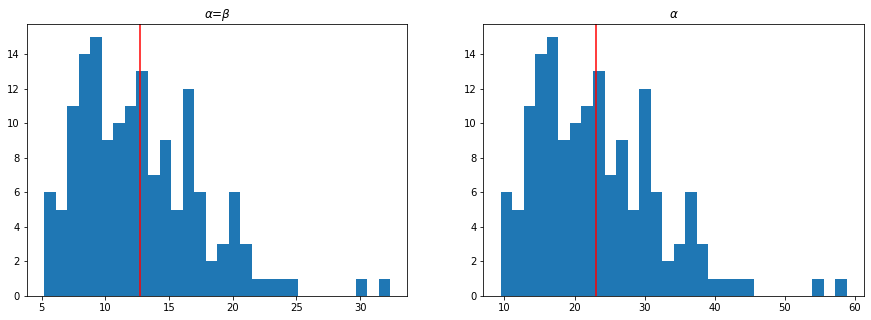

In [5]:
fig, (ax2, ax3) = plt.subplots(1, 2)
data = para_dict['alpha']
ax2.set_title(r'$\alpha$=$\beta$')
ax2.hist(data,30)
ax2.axvline(np.mean(data), color = 'r')

data = para_dict2['alpha']
ax3.set_title(r'$\alpha$')
ax3.hist(data,30)
ax3.axvline(np.mean(data), color = 'r')

fig.set_size_inches(15,5)

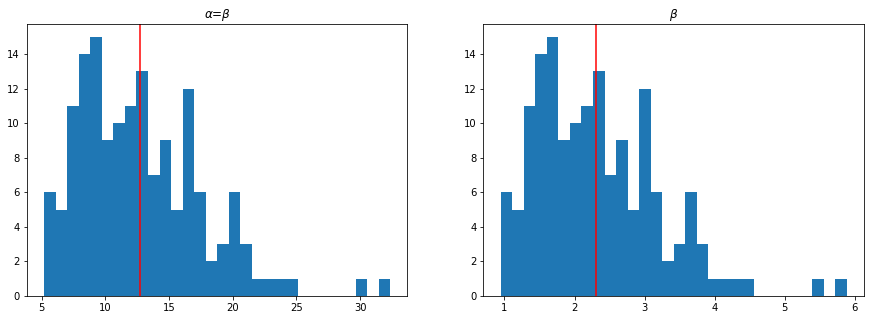

In [6]:
fig, (ax2, ax3) = plt.subplots(1, 2)
data = para_dict['beta']
ax2.set_title(r'$\alpha$=$\beta$')
ax2.hist(data,30)
ax2.axvline(np.mean(data), color = 'r')

data = para_dict2['beta']
ax3.set_title(r'$\beta$')
ax3.hist(data,30)
ax3.axvline(np.mean(data), color = 'r')

fig.set_size_inches(15,5)

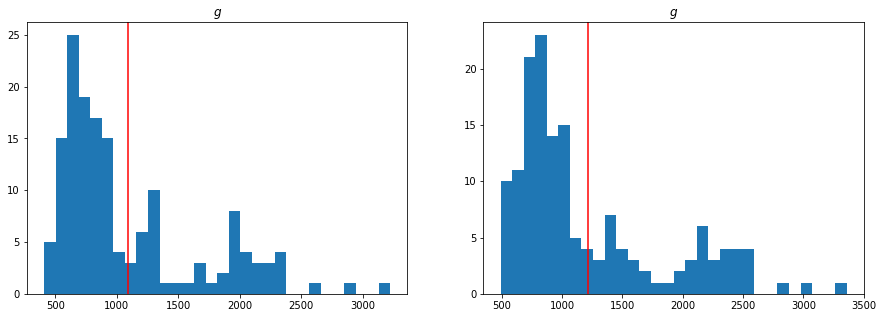

In [7]:
fig, (ax2, ax3) = plt.subplots(1, 2)
data = para_dict['g']
ax2.set_title(r'$g$')
ax2.hist(data,30)
ax2.axvline(np.mean(data), color = 'r')

data = para_dict2['g']
ax3.set_title(r'$g$')
ax3.hist(data,30)
ax3.axvline(np.mean(data), color = 'r')

fig.set_size_inches(15,5)

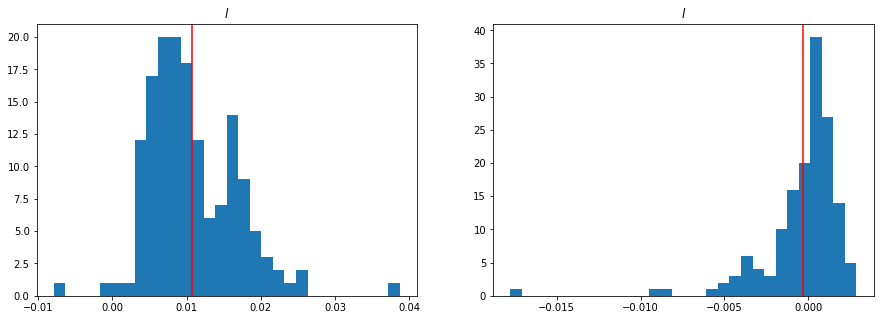

In [8]:
fig, (ax2, ax3) = plt.subplots(1, 2)
data = para_dict['l']
ax2.set_title(r'$l$')
ax2.hist(data,30)
ax2.axvline(np.mean(data), color = 'r')

data = para_dict2['l']
ax3.set_title(r'$l$')
ax3.hist(data,30)
ax3.axvline(np.mean(data), color = 'r')

fig.set_size_inches(15,5)

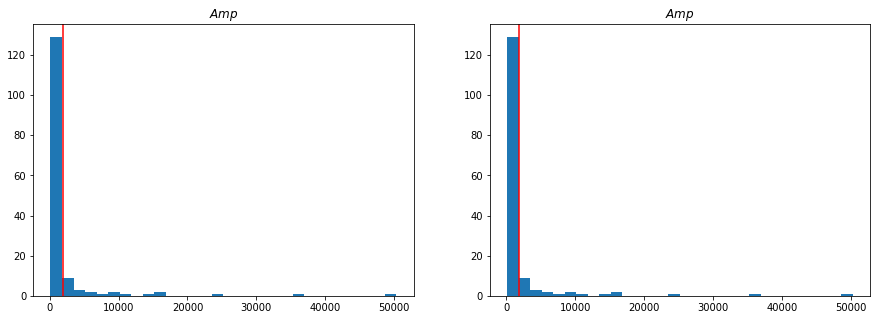

In [9]:
fig, (ax2, ax3) = plt.subplots(1, 2)
data = para_dict['Amp']
ax2.set_title(r'$Amp$')
ax2.hist(data,30)
ax2.axvline(np.mean(data), color = 'r')

data = para_dict2['Amp']
ax3.set_title(r'$Amp$')
ax3.hist(data,30)
ax3.axvline(np.mean(data), color = 'r')

fig.set_size_inches(15,5)